## 1. Data loading and preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Read data into a Pandas dataframe:
df = pd.read_csv('gapminder.csv')
display(df.head(14))
display(df.tail(3))

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


,country,continent,year,lifeExp,pop,gdpPercap
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [2]:
#Create subset of 2007 data only:
df2007=df.loc[df['year']==2007]

#Edit column names so that they look prettier in graph's legend
df2007.columns=['Country','CONTINENT','Year','lifeExp','POPULATION','gdpPercap']

df2007.head()

,Country,CONTINENT,Year,lifeExp,POPULATION,gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640


## 2. Basic workflow in Matplotlib 


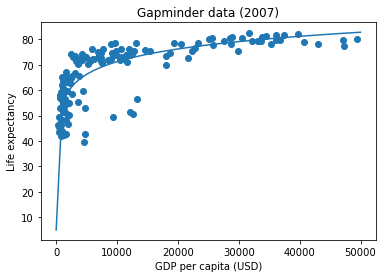

In [3]:
#Create a Figure with 1 Axis:
fig = plt.figure(figsize=(6,4))
ax = plt.axes()

#Create scatter plot of Gapminder 2007 data
ax.scatter(x=df2007['gdpPercap'], y=df2007['lifeExp'])

#Create line plot with the curve y = 4.95 + 7.2 log(x)
X = np.linspace(1,50000)  #Creates an array with the numbers [1,2,3,...,50000]
y = 4.95+7.2*np.log(X)    #Uses the Numpy log() function
ax.plot(X,y)

ax.set(xlabel='GDP per capita (USD)', 
       ylabel='Life expectancy',
       title='Gapminder data (2007)');

#Save the figure to .png, .jpg, .eps or other file format:
#fig.savefig('fig1.png', dpi=200)

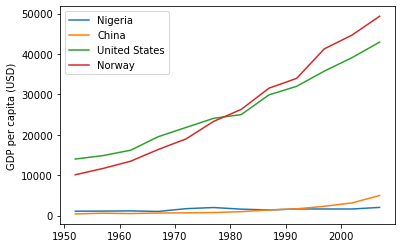

In [4]:
#Exercise #2: line plots showing GDP in Nigeria, China, United States, Norway
fig = plt.figure(figsize=(6,4))
ax = plt.axes()

for c in ['Nigeria','China','United States','Norway']:
    #For each country c, we select the corresponding rows and plot the GDP over the years
    df_c = df[df['country']==c]  
    ax.plot(df_c['year'],df_c['gdpPercap'], label=c)

ax.set(ylabel='GDP per capita (USD)')
ax.legend();

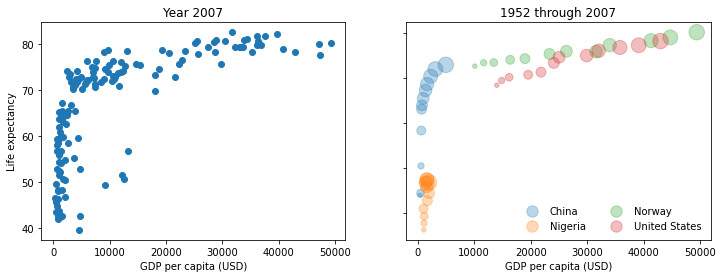

In [5]:
#Create a Figure with two Axes (=subplots):
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

#Make scatter plot in ax[0]
ax[0].scatter(x=df2007['gdpPercap'], y=df2007['lifeExp'])
ax[0].set(xlabel='GDP per capita (USD)', ylabel='Life expectancy',title='Year 2007')

#In ax[1], make scatter plots for four individual countries, 
#showing development from 1952 through 2007
for c in ['China','Nigeria','Norway','United States']:
    df_c=df[df['country']==c]  #select rows referring to country == c
    #scatterplot indicating years by size of dots (small=1952, large=2007) and country by color
    ax[1].scatter(x=df_c['gdpPercap'],y=df_c['lifeExp'],
                  s=4*(df_c['year']-1947), 
                  alpha=.3,
                  label=c)   #Each scatter plot gets a label containing country name to be used in legend

ax[1].set(xlabel='GDP per capita (USD)', yticklabels=[], title='1952 through 2007')

#Add a legend, which uses the labels given in the ax[1].scatter command above
ax[1].legend(frameon=False, ncol=2);

#fig.savefig('fig1.png', dpi=200)

,Country,CONTINENT,Year,lifeExp,POPULATION,gdpPercap
863,Kuwait,Asia,2007,77.588,2505559,47306.98978
1151,Norway,Europe,2007,80.196,4627926,49357.19017
1367,Singapore,Asia,2007,79.972,4553009,47143.17964


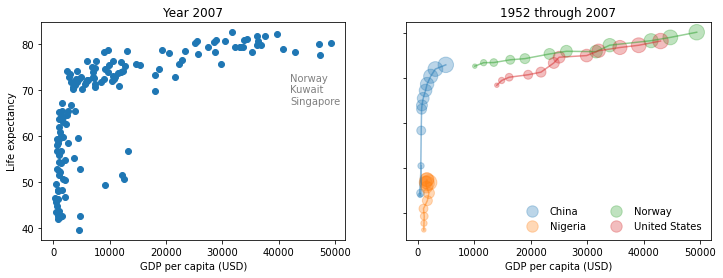

In [6]:
#Exercise #3: add lines connecting the dots from years 1952 ... 2007 in the right graph above
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

ax[0].scatter(x=df2007['gdpPercap'], y=df2007['lifeExp'])
ax[0].set(xlabel='GDP per capita (USD)', ylabel='Life expectancy',title='Year 2007')

for c in ['China','Nigeria','Norway','United States']:
    cdata=df[df['country']==c]  
    ax[1].scatter(x=cdata['gdpPercap'],y=cdata['lifeExp'],s=4*(cdata['year']-1947), alpha=.3,
                 label=c)   
    #Here, we add the connecting lines:
    ax[1].plot(cdata['gdpPercap'],cdata['lifeExp'], alpha=.5)

ax[1].set(xlabel='GDP per capita (USD)', yticklabels=[], title='1952 through 2007')

ax[1].legend(frameon=False, ncol=2)

#Find out 3 countries with biggest GDP
display(df2007[df2007['gdpPercap'] > 45000].head())

#Adding text labels in the graph
ax[0].text(42000,67,"Norway\nKuwait\nSingapore",size=10,color='grey');

#fig.savefig('fig1.png', dpi=200)

## 3. Making graphs prettier

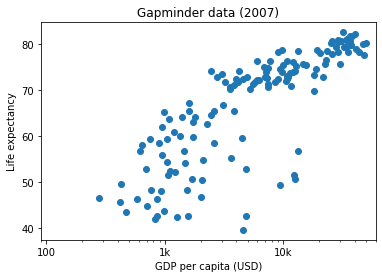

In [7]:
#Same figure as above, but now tweak the axes a bit
fig = plt.figure(figsize=(6,4))
ax = plt.axes()

#Plot GDP on logarithmic scale on x-axis
ax.set_xscale('log')
ax.set(xlim=(90,60000))  #min and max of x-axis
ax.set_xticks([100,1000,10_000])  #location of tick marks
ax.set_xticklabels(['100','1k','10k'])  #... and corresponding labels

#Create scatter plot of Gapminder data
ax.scatter(x=df2007['gdpPercap'], y=df2007['lifeExp'])

ax.set(xlabel='GDP per capita (USD)', ylabel='Life expectancy',title='Gapminder data (2007)');
#fig.savefig('fig1.png', dpi=200)

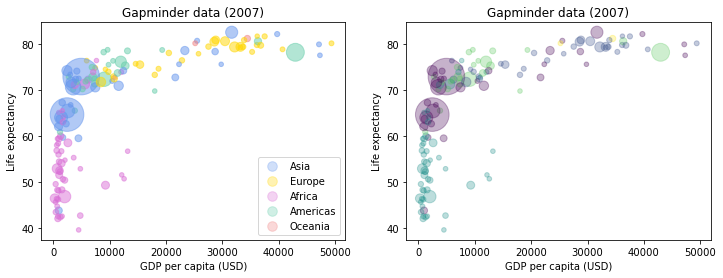

In [14]:
#Same figure as above, but now use prettier colors
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

#Convert populations to acceptable sizes for the points in the scatter:
sizes = (df2007['POPULATION'].values + 20_000_000)/1_000_000

#Left figure: use list of color names

my_palette = {
    'Asia':'cornflowerblue', 
    'Europe':'gold', 
    'Africa':'orchid', 
    'Americas':'mediumaquamarine', 
    'Oceania':'lightcoral'}

#Map continents onto a list of named colors
continents = df2007['CONTINENT'].map(my_palette)

ax[0].scatter(x=df2007['gdpPercap'], y=df2007['lifeExp'], s=sizes, c=continents, alpha=.5)
ax[0].set(xlabel='GDP per capita (USD)', ylabel='Life expectancy',title='Gapminder data (2007)');

#Right figure: use colormap

#Map continents onto [0,..., 4]
continents = df2007['CONTINENT'].map({'Asia':0, 'Europe':1, 'Africa':2, 'Americas':3, 'Oceania':4})
#The 'viridis' colormap is a range of 256 colors. 
#The contintents are mapped such that Asia is viridis[0], Europe is viridis[64], ..., Oceania is viridis[255]
ax[1].scatter(x=df2007['gdpPercap'], y=df2007['lifeExp'], s=sizes, c=continents, cmap='viridis', alpha=.3)
ax[1].set(xlabel='GDP per capita (USD)', ylabel='Life expectancy',title='Gapminder data (2007)')

#Add a legend to left figure by plotting an empty scatter plot
for c in ['Asia', 'Europe', 'Africa', 'Americas', 'Oceania']:
    ax[0].scatter([],[],c=my_palette[c],label=c, alpha=.3)
ax[0].legend(markerscale=1.6);


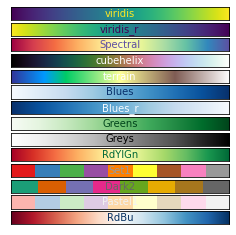

In [15]:
cmaps=['viridis','viridis_r','Spectral','cubehelix','terrain',
       'Blues','Blues_r', 'Greens','Greys','RdYlGn','Set1','Dark2','Pastel1','RdBu']

fig, ax = plt.subplots(nrows=14, ncols=1, figsize=(6,4))

for i in np.arange(0,14):
    cmap=plt.cm.get_cmap(cmaps[i])
    colors=cmap(np.arange(cmap.N))
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].imshow([colors],extent=[0,10,0,.6])
    ax[i].text(5, .3, cmaps[i], ha="center", va="center", color=colors[cmap.N-1]);

#fig.savefig('fig1.png', dpi=200)

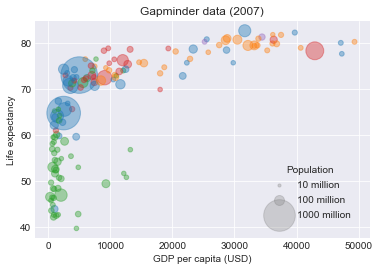

In [16]:
#Same as above, but now we use a stylesheet and add a legend for population size
plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

#Convert populations to acceptable sizes for the points in the scatter:
sizes = (df2007['POPULATION'].values + 20_000_000)/1_000_000

#We use the so-called Tableau colors
my_palette = {
    'Asia':'tab:blue', 
    'Europe':'tab:orange', 
    'Africa':'tab:green', 
    'Americas':'tab:red', 
    'Oceania':'tab:purple'}

#Map continents onto a list of named colors
continents = df2007['CONTINENT'].map(my_palette)

ax.scatter(x=df2007['gdpPercap'], y=df2007['lifeExp'], s=sizes, c=continents, alpha=.4)
ax.set(xlabel='GDP per capita (USD)', ylabel='Life expectancy',title='Gapminder data (2007)');

#Create a legend, by plotting empty lists with the desired colors and sizes
for pop in [10_000_000, 100_000_000, 1000_000_000]:
    ax.scatter([],[],c='grey',s=(pop+20000)/1000_000,label=str(pop)[:-6]+' million', alpha=.3)
ax.legend(frameon=False, labelspacing=.6, title='Population',borderpad=1.4);


## 4. Seaborn graphics

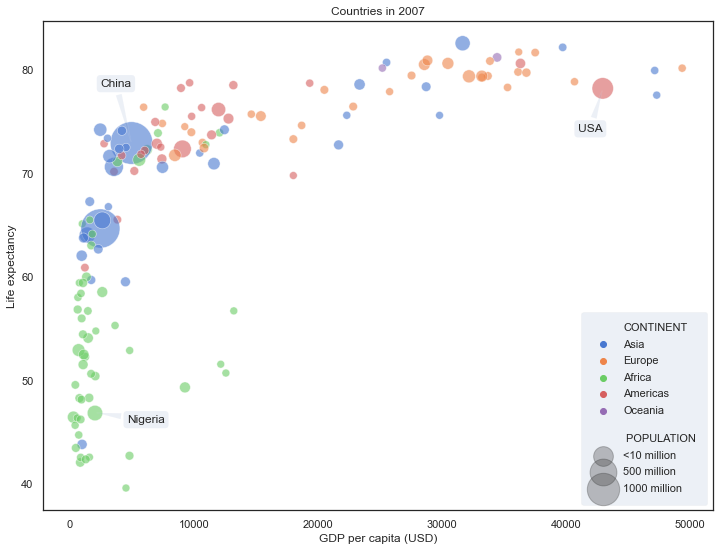

In [17]:
sns.set(style="white")
fig=plt.figure(figsize=(12,9))
ax = sns.scatterplot(y=df2007['lifeExp'], x=df2007['gdpPercap'], 
            hue=df2007['CONTINENT'], size=df2007['POPULATION'], 
            palette='muted', alpha=.6, sizes=(60,1800))
ax.set(xlabel='GDP per capita (USD)', ylabel='Life expectancy',title='Countries in 2007')

#Now make the legend prettier
ax.legend()
handles, labels = ax.get_legend_handles_labels()
#labels[0]...labels[5] are 'CONTINENT', ..., 'Oceania' are good as is
labels[6]='\n POPULATION'  #Add a '\n' to get an empty line before 'POPULATION'
labels[7]='<10 million'    #Instead of the original value '0'
labels[8]='500 million'    #Instead of the original value '500000000'
labels[9]='1000 million'   #Etc.
labels[10]='1500 million'
handles[7].set_alpha(.3)   #Make the circles in the legend transparent
handles[8].set_alpha(.3)
handles[9].set_alpha(.3)
handles[10].set_alpha(.3)
#Only plot the first 9 labels (without the circle corresponding to 1500 million)
ax.legend(handles[:10],labels[:10],borderpad=1,frameon=True, labelspacing=.6, facecolor='b',framealpha=.1)

#Annotation
ax.annotate('China',xy=(4959,72.9),xycoords='data',xytext=(0,60),textcoords='offset points',
           size=12, ha='right',va='center',
           bbox=dict(boxstyle='round',alpha=.1),
           arrowprops=dict(arrowstyle="wedge,tail_width=0.5",alpha=.1))
ax.annotate('USA',xy=(42950,78.2),xycoords='data',xytext=(0,-40),textcoords='offset points',
           size=12, ha='right',va='center',
           bbox=dict(boxstyle='round',alpha=.1),
           arrowprops=dict(arrowstyle="wedge,tail_width=0.5",alpha=.1))
ax.annotate('Nigeria',xy=(2014,46.9),xycoords='data',xytext=(70,-7),textcoords='offset points',
           size=12, ha='right',va='center',
           bbox=dict(boxstyle='round',alpha=.1),
           arrowprops=dict(arrowstyle="wedge,tail_width=0.5",alpha=.1));
#fig.savefig('gapminder.png',dpi=200)

## 5. Types of plots

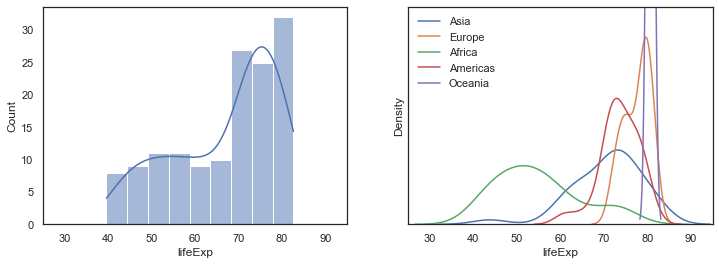

In [26]:
#Distribution plots
sns.set(style="white",palette='deep')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

#left graph: total distribution (histogram)
sns.histplot(df2007['lifeExp'],ax=ax[0], kde=True)
ax[0].set(xlim=(25,95))

#right graph: life expectancy per continent (kde-plots)
for c in df2007['CONTINENT'].unique():
    sns.kdeplot(df2007[df2007['CONTINENT']==c]['lifeExp'], label=c,ax=ax[1])
ax[1].set(ylim=(0,.15),yticks=[],xlim=(25,95))
ax[1].legend();

#fig.savefig('fig1.png', dpi=200)

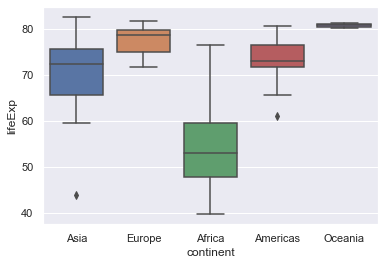

In [27]:
#Box plot
sns.set(style="darkgrid",palette='deep')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

sns.boxplot(x='continent',y='lifeExp',
               data=df[df['year']==2007]);

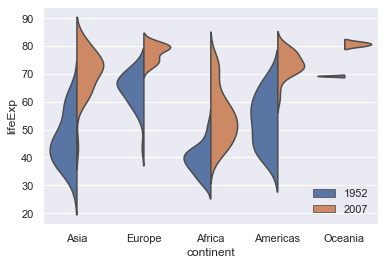

In [28]:
#Violin plot
sns.set(style="darkgrid",palette='deep')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

sns.violinplot(x='continent',y='lifeExp',hue='year',
               data=df[(df['year']==1952) | (df['year']==2007)], 
               split=True, scale='width', inner=None);

ax.legend(loc='lower right');   #Place legend at lower right corner

#fig.savefig('fig1.png', dpi=200)

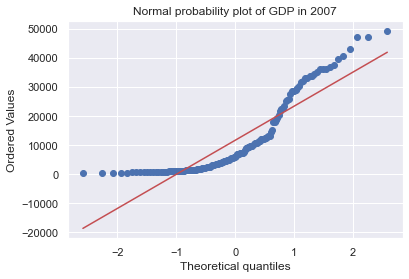

In [29]:
#Probability plot
from scipy import stats
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

stats.probplot(df2007['gdpPercap'],dist=stats.norm,plot=ax)
ax.set(title='Normal probability plot of GDP in 2007');


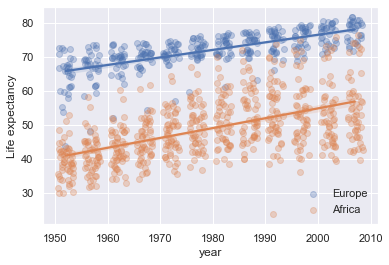

In [32]:
sns.set(style='darkgrid', palette='deep')

#We use the AXIS-LEVEL regplot function
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
sns.regplot(y='lifeExp',x='year',
              data=df[df['continent']=='Europe'], label='Europe',
              x_jitter=1.5, scatter_kws={'alpha':0.3}, ax=ax)
#regplot uses the sns.scatter function to plot the scatter.
#We can pass arguments to sns.scatter via: scatter_kws={'arg-name':value}
#Note that scatter_kws is a dictionary

sns.regplot(y='lifeExp',x='year',
              data=df[df['continent']=='Africa'], label='Africa',
              x_jitter=1.5, scatter_kws={'alpha':0.3}, ax=ax)
ax.legend()
ax.set(ylabel='Life expectancy');

#plt.savefig('fig1.png', dpi=200)

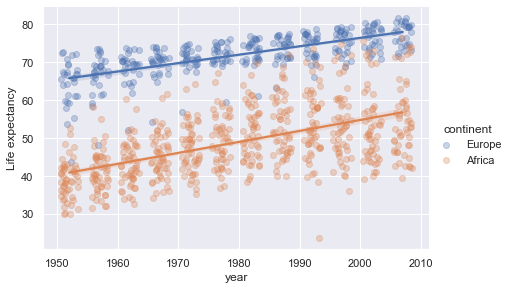

In [33]:
#Same as above, but now using the FIGURE-level function LMPLOT
sns.set(style='darkgrid', palette='deep')

#Note that we don't do: fig, ax = plt.subplots
#instead, figure-level plots do that themselves
ax = sns.lmplot(y='lifeExp',x='year',
              data=df[(df['continent']=='Europe') | (df['continent']=='Africa')],
              hue='continent', aspect=1.5, height=4,
              x_jitter=1.5, scatter_kws={'alpha':0.3})
ax.set(ylabel='Life expectancy');

#plt.savefig('fig1.png', dpi=200)

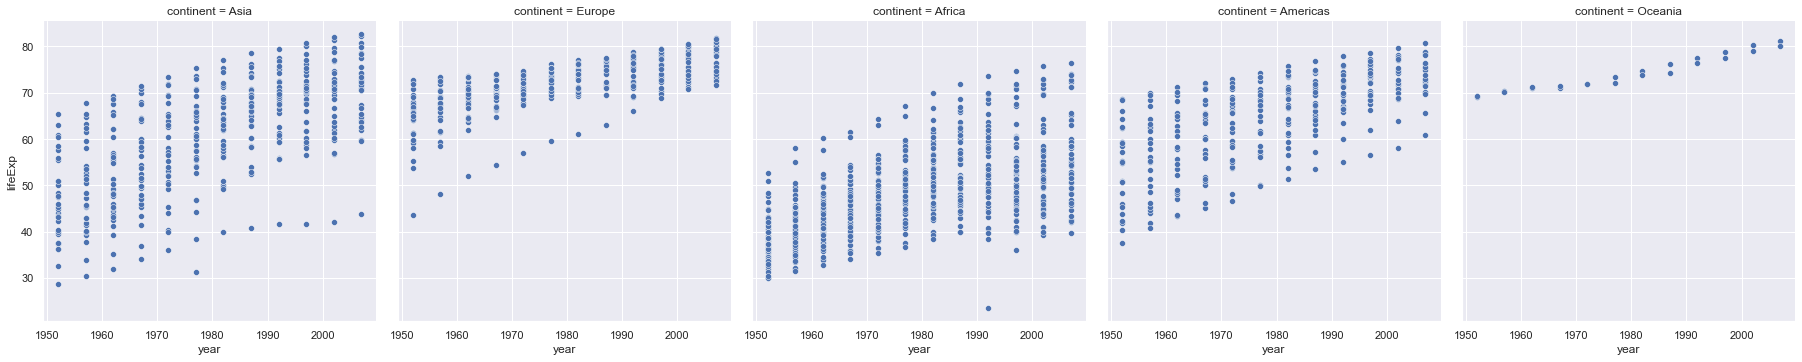

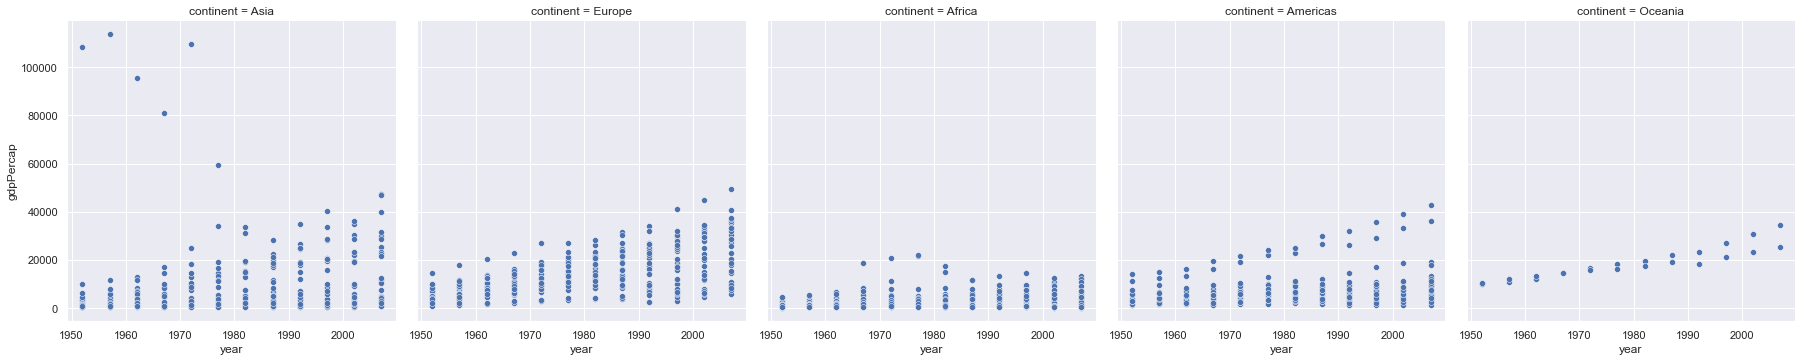

In [34]:
sns.set(style='darkgrid', palette='deep')
sns.relplot(x='year',y='lifeExp',data=df,col='continent')
sns.relplot(x='year',y='gdpPercap',data=df,col='continent');


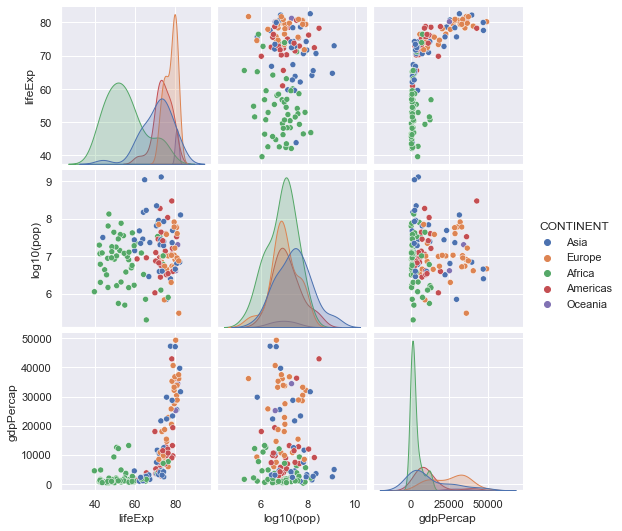

In [35]:
#Add column with population on log-scale
df2007 = pd.concat([df2007,np.log10(df2007['POPULATION']).rename('log10(pop)')], axis=1)

#Pairplot
sns.pairplot(data=df2007[['lifeExp','log10(pop)','gdpPercap','CONTINENT']],hue='CONTINENT');


In [36]:
df[(df['gdpPercap']>50000)& (df['continent']=='Asia')].head(20)

,country,continent,year,lifeExp,pop,gdpPercap
852,Kuwait,Asia,1952,55.565,160000,108382.35290
853,Kuwait,Asia,1957,58.033,212846,113523.13290
854,Kuwait,Asia,1962,60.470,358266,95458.11176
855,Kuwait,Asia,1967,64.624,575003,80894.88326
856,Kuwait,Asia,1972,67.712,841934,109347.86700
857,Kuwait,Asia,1977,69.343,1140357,59265.47714


## 6. Visualizing matrices and tables

In [37]:
#Dataset corr-dataset.csv

#Load dataset
c_df=pd.read_csv('corr-dataset.csv',sep=';')
c_df.head(5).append(c_df.tail(3))

,x1,x2,x3,x4,x5,x6,x7,x8
0,9.835686,0.301576,41.239031,-7.892641,1.451323,0.572772,14.058708,15.489075
1,9.466623,0.299992,40.887116,-7.601139,0.983539,0.580252,12.940511,13.587199
2,9.732948,0.298871,39.337279,-7.782133,1.400192,0.591368,12.140974,13.521967
3,9.932379,0.299880,40.815846,-8.193237,1.635478,0.589460,14.146623,15.562558
4,10.221520,0.298608,40.741976,-8.431555,1.104980,0.625550,12.793626,13.810866
997,9.839140,0.299364,39.406415,-7.958769,1.345728,0.604333,12.165666,13.481026
998,10.330750,0.299780,39.836209,-8.558214,1.293103,0.614853,12.609992,13.899062
999,9.800452,0.299138,40.464992,-7.817773,1.462192,0.569086,13.451401,14.980794


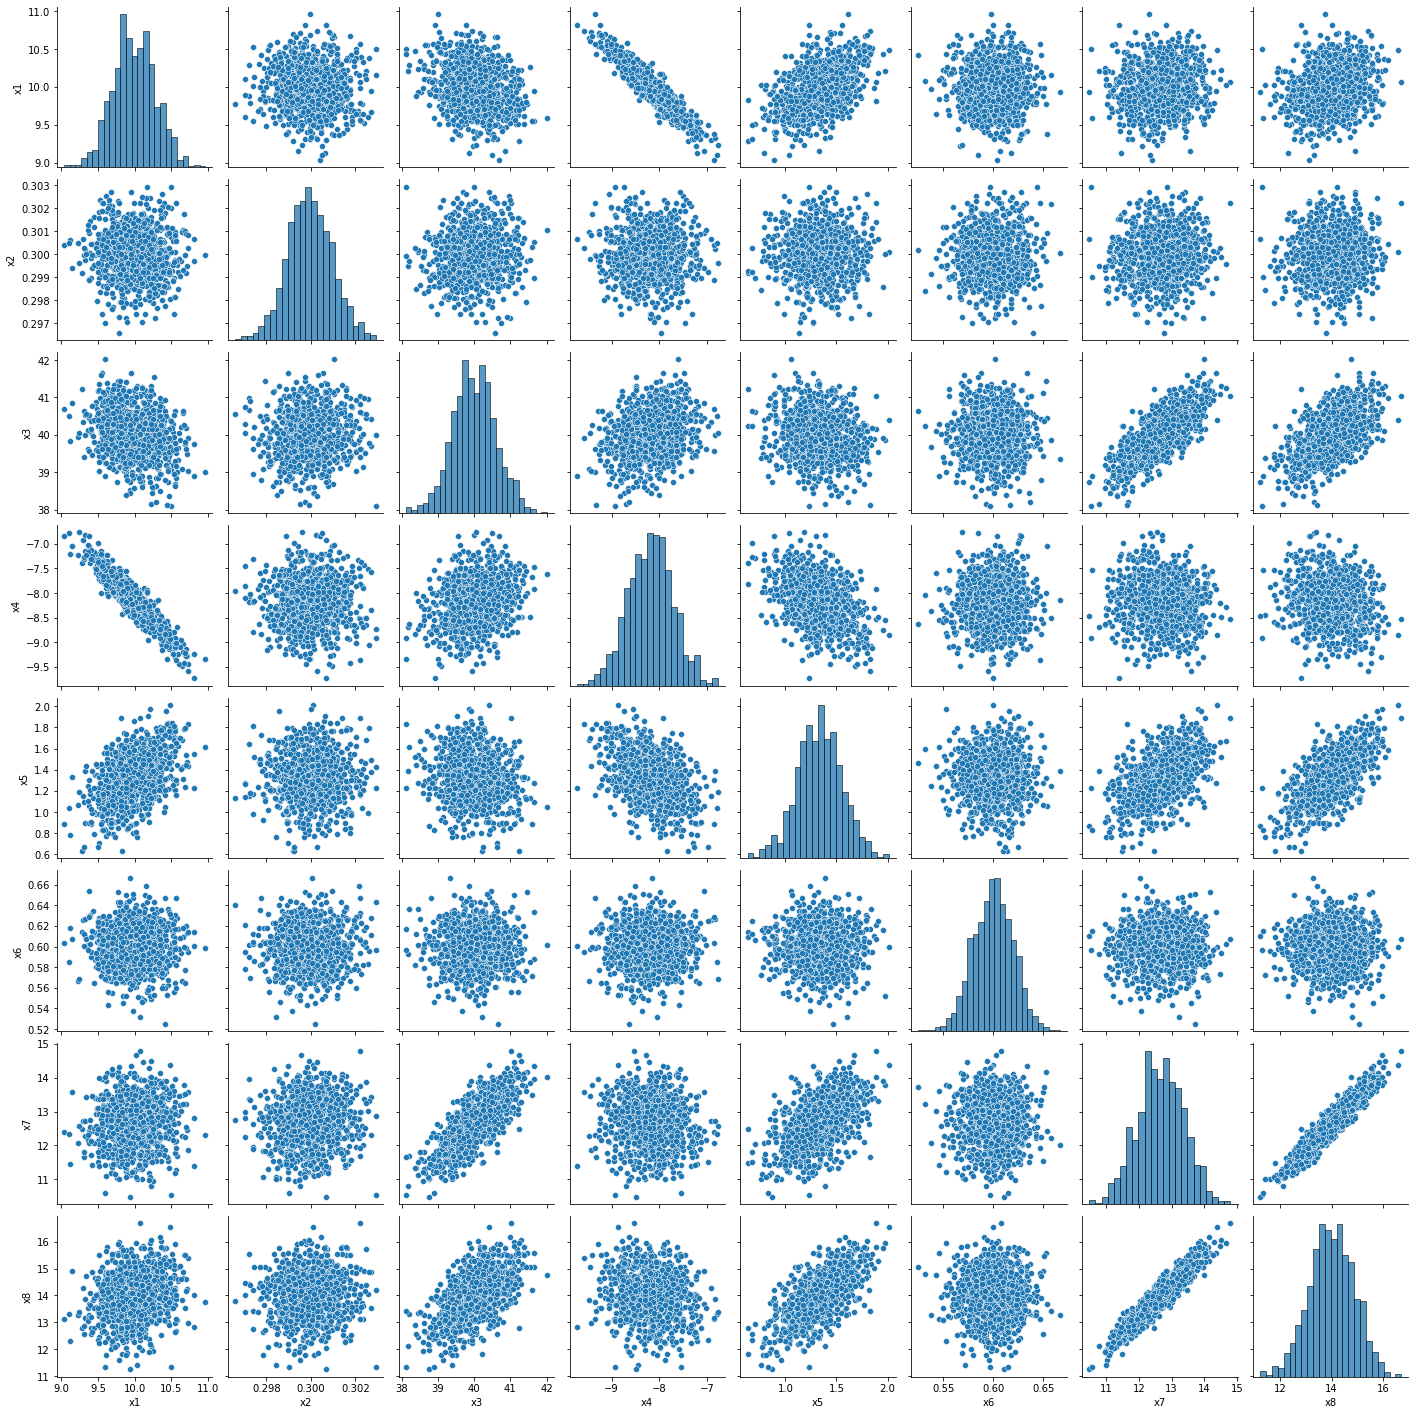

In [24]:
fig = sns.pairplot(data=c_df)
fig.savefig('fig2.png', dpi=200);

Correlations between X1, X2, ..., X8:

[[ 1.00 -0.03 -0.24 -0.94  0.48 -0.01  0.09  0.20]
 [-0.03  1.00  0.06  0.00  0.02  0.02  0.07  0.06]
 [-0.24  0.06  1.00  0.24 -0.13 -0.00  0.77  0.59]
 [-0.94  0.00  0.24  1.00 -0.43 -0.00 -0.07 -0.17]
 [ 0.48  0.02 -0.13 -0.43  1.00 -0.01  0.52  0.68]
 [-0.01  0.02 -0.00 -0.00 -0.01  1.00  0.00 -0.01]
 [ 0.09  0.07  0.77 -0.07  0.52  0.00  1.00  0.95]
 [ 0.20  0.06  0.59 -0.17  0.68 -0.01  0.95  1.00]]

Correlations displayed in a heat map:


<AxesSubplot:>

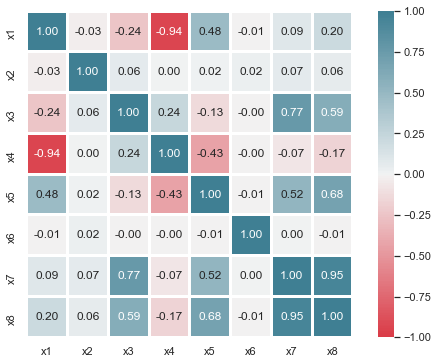

In [39]:
#Compute correlations and print correlation matrix
corr=c_df.corr()
np.set_printoptions(suppress=True, floatmode='fixed', precision=2)   
    #This tells Numpy not to use scientific notation, and instead: 0.00 notation 
print("Correlations between X1, X2, ..., X8:\n")
print(corr.values)

print("\nCorrelations displayed in a heat map:")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
sns.heatmap(corr,vmin=-1, vmax=1, 
            cmap=sns.diverging_palette(10, 220, n=200), 
            linewidths=2, annot=True, ax=ax, square=True, fmt=".2f")

#In older versions of Matplotlib: The two lines below correct a bug in Matplotlib
#Without this correction, the top and bottom row are cut in half
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5);

#fig.savefig('fig1.png', dpi=200)

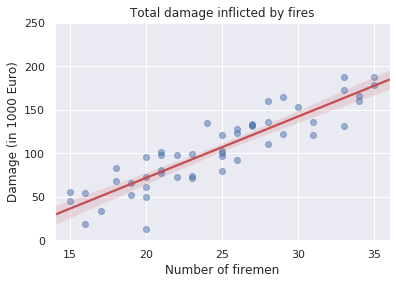

In [24]:
#Damage against firemen example

x = np.around(np.random.uniform(15,35,50))
y = -73.8 + 7.28*x + np.random.normal(0,20,50)
data = pd.DataFrame({'x':x, 'y':y})

sns.set(style='darkgrid',palette='deep')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
sns.regplot(y='y', x='x', data=data, ax=ax,
              scatter_kws={'alpha':.5, 'color':'b'},line_kws={'color':'r'})
ax.set(ylabel='Damage (in 1000 Euro)', xlabel='Number of firemen',
       title='Total damage inflicted by fires',
       ylim=(0,250),xticks=np.arange(15,36,5));

#plt.savefig('fig1.png', dpi=200)

In [33]:
df['country'].nunique()

142